<h1 align='center'>Análisis del Comportamiento de Clientes en Megaline</h1>
<h2>¿Cuál es la mejor tarifa?</h2>

El operador de telecomunicaciones Megaline ofrece a sus clientes dos tarifas de prepago: Surf y Ultimate. El departamento comercial desea identificar cuál de estas tarifas genera más ingresos para ajustar el presupuesto de publicidad.

Para ello, se realizará un análisis preliminar utilizando datos de una muestra de 500 clientes de Megaline. Los datos incluyen la identidad de los clientes, su ubicación, la tarifa que utilizan, así como la cantidad de llamadas y mensajes de texto enviados en 2018.

## Plan de acción

### Objetivo
El objetivo principal es evaluar el comportamiento de los clientes y determinar cuál tarifa de prepago es más rentable, proporcionando información clave para ajustar el presupuesto publicitario de la empresa
 

**Paso 1: Exploración de Datos**

Se iniciará recolectando la información general de los archivos de datos disponibles para 500 clientes de Megaline. Estos datos incluyen información sobre llamadas, uso de internet, mensajes y detalles específicos de los planes y usuarios.

El conjunto de datos se almacenan en los siguientes directorios: 
- Users: `/datasets/megaline_users.csv`
- Calls: `/datasets/megaline_calls.csv`
- Messages: `/datasets/megaline_messages.csv`
- Internet: `/datasets/megaline_internet.csv`
- Plans: `/datasets/megaline_plans.csv`


**Paso 2: Preparación de Datos**

El siguiente paso implica preparar los datos para su análisis. Esto incluye la conversión de los tipos de datos necesarios y la identificación y eliminación de posibles errores. 

**Paso 3: Análisis de Datos**

En esta etapa, se describirá el comportamiento de la clientela mediante el análisis de minutos, SMS y volumen de datos requeridos por los usuarios de cada tarifa por mes. Se calcularán la media, la varianza y la desviación estándar, y se representarán mediante histogramas para entender las distribuciones.

**Paso 4: Pruebas de Hipótesis**

Se realizarán pruebas de hipótesis para dos afirmaciones clave: el ingreso promedio de los usuarios de las tarifas Ultimate y Surf difiere, y que el ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey es diferente al de los usuarios en otras regiones. Se explicará la formulación de las hipótesis nula y alternativa, así como los criterios utilizados para probarlas.

**Paso 5: Conclusión General**

Finalmente, se elaborará una conclusión general que resuma los hallazgos del análisis. Esta conclusión proporcionará información valiosa para que el departamento comercial de Megaline tome decisiones informadas sobre la asignación de presupuesto publicitario y la optimización de los planes de prepago. En este proyecto, se busca no solo analizar datos, sino también proporcionar una visión estratégica que impacte positivamente en el negocio de Megaline.

# Contenido <a id='back'></a>

* [Exploración de Datos](#data_exploration)
* [Preparación de Datos](#data_review)
* [Análisis de Datos](#data_analysis)
* [Pruebas de Hipótesis](#hypothesis)
* [Conclusión](#end)

## Exploración de Datos <a id='data_exploration'></a>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt

In [2]:
# Acceso a los registros de los recursos "users", "calls", "messages", "internet" y "plans"

df_users = pd.read_csv('./datasets/megaline_users.csv')

df_calls = pd.read_csv('./datasets/megaline_calls.csv')

df_messages = pd.read_csv('./datasets/megaline_messages.csv')

df_internet = pd.read_csv('./datasets/megaline_internet.csv')

df_plans = pd.read_csv('./datasets/megaline_plans.csv')

[Volver a Contenidos](#back)

## Preparar los datos <a id='data_review'></a>

### Información general sobre los registros del DataFrame 'plans'

In [3]:

print("\033[1m Muestra aleatoria de filas del DataFrame 'plans':")

display(df_plans.head())

print("\033[1m Resumen del DataFrame 'plans':\033[0m \n")

df_plans.info()

 Muestra aleatoria de filas del DataFrame 'plans':


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


 Resumen del DataFrame 'plans': 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


El DataFrame `plans` no presenta inconvenientes relacionados con tipos de datos incorrectos en sus campos, ni se observan datos ausentes ni duplicados.

*Notas extras:*
En un enfoque objetivo, se consideraría una buena práctica crear una nueva columna denominada `id_plan` para establecer una base de datos escalable. Actualmente, no existen problemas, ya que la empresa solo cuenta con dos planes. Sin embargo, para garantizar una mayor eficiencia en el desarrollo y análisis en el futuro, sería recomendable incluir identificadores (`ids`).

[Volver a Contenidos](#back)

### Información general sobre los registros del DataFrame 'users'

In [4]:

print("\033[1m Muestra aleatoria de filas del DataFrame 'users':")

display(df_users.sample(15, random_state=1425))

print("\033[1m Resumen del DataFrame 'users':\033[0m \n")

df_users.info()

 Muestra aleatoria de filas del DataFrame 'users':


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
258,1258,Kai,Russell,39,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-07-12,surf,NaN
376,1376,Mika,Williams,58,"Columbia, SC MSA",2018-04-16,ultimate,NaN
469,1469,Rory,Nixon,75,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-04,surf,NaN
78,1078,Earnest,Gray,47,"Seattle-Tacoma-Bellevue, WA MSA",2018-02-11,surf,NaN
60,1060,Denisse,Santos,53,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-04-07,surf,NaN
152,1152,Merrill,Hogan,35,"Orlando-Kissimmee-Sanford, FL MSA",2018-11-01,surf,NaN
306,1306,Darron,Craig,19,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",2018-11-26,surf,NaN
16,1016,Jann,Salinas,30,"Fresno, CA MSA",2018-10-25,surf,NaN
269,1269,Irving,Thompson,39,"Dallas-Fort Worth-Arlington, TX MSA",2018-09-13,ultimate,2018-12-15
463,1463,Dinorah,Simmons,30,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-11-27,ultimate,NaN


 Resumen del DataFrame 'users': 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [5]:
print('Número de filas duplicadas: ',df_users.duplicated().sum())

Número de filas duplicadas:  0


Los datos en `df_users` no presentan muchos inconvenientes; únicamente la fila `churn_date` tiene valores ausentes, lo cual es comprensible ya que hay clientes que aún no se han dado de baja en el servicio. Además, no se han encontrado registros duplicados. Los únicos cambios que deben realizarse son la conversión de los tipos de dato de `string` a `date` en las columnas `reg_date` y `churn_date`. Para llevar a cabo esta modificación, se utilizará la función `pandas.to_datetime()`.

In [6]:
#Trasnformación de datos de tipo `string` a tipo `datetime` en `reg_date` y `churn_date`

df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])

df_users['churn_date'] = pd.to_datetime(df_users['churn_date'])

df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


[Volver a Contenidos](#back)

### Información general sobre los registros del DataFrame 'calls'

In [7]:
print("\033[1m Muestra aleatoria de filas del DataFrame 'calls':")

display(df_calls.sample(15, random_state=1425))

print("\033[1m Resumen del DataFrame 'calls':\033[0m \n")

df_calls.info()

 Muestra aleatoria de filas del DataFrame 'calls':


,id,user_id,call_date,duration
134023,1488_108,1488,2018-07-18,11.42
30064,1113_327,1113,2018-11-24,4.72
32823,1123_181,1123,2018-11-04,3.37
80108,1288_43,1288,2018-10-28,0.00
4896,1022_162,1022,2018-12-15,8.71
26056,1099_380,1099,2018-03-04,7.55
83796,1305_247,1305,2018-12-20,21.04
105301,1370_627,1370,2018-11-15,9.16
134978,1490_78,1490,2018-11-05,3.70
5017,1022_283,1022,2018-09-29,13.13


 Resumen del DataFrame 'calls': 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [8]:
print('Número de filas duplicadas: ',df_calls.duplicated().sum())

Número de filas duplicadas:  0


Los datos en `df_calls` no presentan inconvenientes con valores ausentes ni duplicados. Únicamente se requiere realizar la conversión del tipo de dato de string a date en la columna `call_date` mediante la función `pandas.to_datetime()`.

In [9]:
#Trasnformación de datos de tipo `string` a tipo `datetime` en `call_date`

df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])

df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


[Volver a Contenidos](#back)

In [10]:
# Nota: Megaline redondea los segundos a minutos y los megabytes a gigabytes. 

# Entonces se redondea la duración de las llamadas y se convierte la columna al tipo de dato entero
df_calls['duration'] = np.ceil(df_calls['duration'])

df_calls['duration'] = df_calls['duration'].astype('int')

df_calls.sample(10, random_state=258)

,id,user_id,call_date,duration
45936,1167_19,1167,2018-11-20,12
31751,1120_91,1120,2018-05-04,0
106830,1379_28,1379,2018-12-11,14
112009,1393_208,1393,2018-10-31,15
95513,1338_334,1338,2018-12-08,13
37180,1141_11,1141,2018-09-28,8
63393,1231_107,1231,2018-10-11,5
68480,1246_499,1246,2018-04-20,14
47181,1171_212,1171,2018-02-18,12
119641,1417_189,1417,2018-07-13,15


### Información general sobre los registros del DataFrame 'messages'

In [11]:

print("\033[1m Muestra aleatoria de filas del DataFrame 'messages':")

display(df_messages.sample(15, random_state=1425))

print("\033[1m Resumen del DataFrame 'messages':\033[0m \n")

df_messages.info()

 Muestra aleatoria de filas del DataFrame 'messages':


,id,user_id,message_date
29874,1184_32,1184,2018-12-21
53628,1340_154,1340,2018-09-14
70808,1460_341,1460,2018-07-17
72894,1470_522,1470,2018-10-15
27270,1167_227,1167,2018-10-10
32764,1203_409,1203,2018-09-27
54259,1343_350,1343,2018-09-13
58958,1374_132,1374,2018-12-22
67710,1439_104,1439,2018-05-14
2140,1028_45,1028,2018-03-15


 Resumen del DataFrame 'messages': 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [12]:
print('Número de filas duplicadas: ',df_messages.duplicated().sum())

Número de filas duplicadas:  0


Los datos en `df_messages` no presentan inconvenientes con valores ausentes ni duplicados. Únicamente se requiere realizar la conversión del tipo de dato de string a date en la columna `message_date` mediante la función `pandas.to_datetime()`.

In [13]:
#Trasnformación de datos de tipo `string` a tipo `datetime` en `message_date`

df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])

df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


[Volver a Contenidos](#back)

### Información general sobre los registros del DataFrame 'internet'

In [14]:
print("\033[1m Muestra aleatoria de filas del DataFrame 'internet':")

display(df_internet.sample(15, random_state=1425))

print("\033[1m Resumen del DataFrame 'internet':\033[0m \n")

df_internet.info()

 Muestra aleatoria de filas del DataFrame 'internet':


,id,user_id,session_date,mb_used
2786,1013_323,1013,2018-12-09,273.43
15266,1069_36,1069,2018-10-17,884.06
90654,1417_299,1417,2018-09-04,316.38
38727,1173_302,1173,2018-10-21,455.85
58228,1263_32,1263,2018-11-15,886.27
57441,1258_604,1258,2018-08-01,364.68
46410,1206_227,1206,2018-11-01,363.84
77577,1362_253,1362,2018-08-24,419.62
42172,1187_349,1187,2018-04-28,0.00
13386,1062_356,1062,2018-06-07,328.66


 Resumen del DataFrame 'internet': 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [15]:
print('Número de filas duplicadas: ',df_internet.duplicated().sum())

Número de filas duplicadas:  0


Los datos en `df_internet` no presentan inconvenientes con valores ausentes ni duplicados. Únicamente se requiere realizar la conversión del tipo de dato de string a date en la columna `session_date` mediante la función `pandas.to_datetime()`.

In [16]:
#Trasnformación de datos de tipo `string` a tipo `datetime` en `session_date`

df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])

df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


[Volver a Contenidos](#back)

## Agregar datos por usuario


In [17]:
# Conocer el rango de fechas con las que se trabaja
print(f"Rango de fechas de los registros: {df_calls['call_date'].min()}  -  {df_calls['call_date'].max()}")

Rango de fechas de los registros: 2018-01-15 00:00:00  -  2018-12-31 00:00:00


In [18]:
# Calcular el número de llamadas hechas por cada usuario al mes.

df_calls_number =  df_calls.groupby(['user_id', df_calls['call_date'].dt.month])['id'].count().reset_index()

df_calls_number.columns = ['user_id','month','calls_number']

df_calls_number.sort_values('calls_number', ascending=False)

,user_id,month,calls_number
1242,1267,12,205
1487,1329,12,191
1733,1382,8,182
1100,1240,9,180
1669,1365,12,180
...,...,...,...
1541,1339,11,1
1539,1339,9,1
1388,1310,11,1
432,1094,10,1


In [19]:
# Calcular la cantidad de minutos usados por cada usuario al mes. 

df_calls_minutes = df_calls.groupby(['user_id', df_calls['call_date'].dt.month])['duration'].sum().reset_index()

df_calls_minutes.columns = ['user_id', 'month', 'call_duration']

df_calls_minutes.sort_values('call_duration', ascending=False)

,user_id,month,call_duration
1242,1267,12,1510
1487,1329,12,1369
1669,1365,12,1357
1459,1324,11,1304
1737,1382,12,1295
...,...,...,...
1383,1306,11,6
1905,1414,8,4
1539,1339,9,2
432,1094,10,0


In [20]:
# Calcular el número de mensajes enviados por cada usuario al mes. 

df_message_number =  df_messages.groupby(['user_id', df_messages['message_date'].dt.month])['id'].count().reset_index()

df_message_number.columns = ['user_id', 'month', 'message_number']

df_message_number.sort_values('message_number', ascending=False)

,user_id,month,message_number
140,1052,12,266
1418,1381,10,224
1419,1381,11,180
1212,1328,12,168
485,1132,11,166
...,...,...,...
434,1123,6,1
1015,1263,12,1
1772,1484,11,1
1014,1263,11,1


In [21]:
# Calcular el volumen del tráfico de Internet usado por cada usuario al mes.

df_internet_volumen = df_internet.groupby(['user_id', df_internet['session_date'].dt.month])['mb_used'].sum().reset_index()


# Nota: Megaline redondea los segundos a minutos y los megabytes a gigabytes. 
# Entonces se redondea el volumen del tráfico de Internet usado por cada usuario al mes de mb a gb
# y se convierte la columna al tipo de dato entero
df_internet_volumen['mb_used'] = np.ceil(df_internet_volumen['mb_used'] / 1024).astype('int')

df_internet_volumen. columns = ['user_id', 'month', 'gb_used']

df_internet_volumen.sort_values('gb_used', ascending=False)

,user_id,month,gb_used
1752,1379,12,70
569,1121,12,66
1359,1292,12,51
1355,1292,8,51
1126,1240,8,49
...,...,...,...
557,1119,11,1
995,1209,8,1
2198,1482,12,1
125,1034,8,1


In [22]:
# Fusionar los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
df_merged = pd.merge(df_calls_number, df_calls_minutes, on=['user_id', 'month'], how='outer')
df_merged = pd.merge(df_merged, df_message_number, on=['user_id', 'month'], how='outer')
df_merged = pd.merge(df_merged, df_internet_volumen, on=['user_id', 'month'], how='outer')

#Reemplazar valores nulos con 0 (indica que no se realizaron llamadas, mensajes o uso de internet)
df_merged['calls_number'] = df_merged['calls_number'].fillna(0)
df_merged['call_duration'] = df_merged['call_duration'].fillna(0)
df_merged['message_number'] = df_merged['message_number'].fillna(0)
df_merged['gb_used'] = df_merged['gb_used'].fillna(0)
df_merged

,user_id,month,calls_number,call_duration,message_number,gb_used
0,1000,12,16.0,124.0,11.0,2.0
1,1001,8,27.0,182.0,30.0,7.0
2,1001,9,49.0,315.0,44.0,14.0
3,1001,10,65.0,393.0,53.0,22.0
4,1001,11,64.0,426.0,36.0,19.0
...,...,...,...,...,...,...
2288,1498,12,39.0,339.0,0.0,23.0
2289,1499,9,41.0,346.0,0.0,13.0
2290,1499,10,53.0,385.0,0.0,20.0
2291,1499,11,45.0,308.0,0.0,17.0


In [23]:
# Añadir la información de la tarifa
df_merged = pd.merge(df_merged, df_users[['user_id', 'plan']], on='user_id', how='left')

df_merged

,user_id,month,calls_number,call_duration,message_number,gb_used,plan
0,1000,12,16.0,124.0,11.0,2.0,ultimate
1,1001,8,27.0,182.0,30.0,7.0,surf
2,1001,9,49.0,315.0,44.0,14.0,surf
3,1001,10,65.0,393.0,53.0,22.0,surf
4,1001,11,64.0,426.0,36.0,19.0,surf
...,...,...,...,...,...,...,...
2288,1498,12,39.0,339.0,0.0,23.0,surf
2289,1499,9,41.0,346.0,0.0,13.0,surf
2290,1499,10,53.0,385.0,0.0,20.0,surf
2291,1499,11,45.0,308.0,0.0,17.0,surf


In [24]:
# Calcula el ingreso mensual para cada usuario

"""
    La función `get_data_plans` recupera el valor de una columna específica del DataFrame plans basándose en el nombre del plan.
    
    :param nombre_plan: El nombre del plan del que desea recuperar datos
    :param columna: El parámetro columna es el nombre de la columna del DataFrame del que desea
    recuperar los datos
    :return: el valor de la columna especificada para el nombre del plan dado en el marco de datos df_plans.
"""
def get_data_plans(plan_name, column):
    return df_plans[df_plans['plan_name'] == plan_name][column].values[0]

In [25]:
# Aplicar una función anonima para calcular los excedentes del uso de minutos, mensajes y gb en internet

# Diferencia entre el límite del plan y la duración de la llamada de un usuario al mes
df_merged['calls_exceeded'] = df_merged.apply(lambda row: row['call_duration'] - get_data_plans(row['plan'], 'minutes_included'), axis=1)

# Diferencia entre el límite del plan y la cantidad de SMS de un usuario al mes
df_merged['message_exceeded'] = df_merged.apply(lambda row: row['message_number'] - get_data_plans(row['plan'], 'messages_included'), axis=1)

# Diferencia entre el límite del plan y la cantidad de GB usadas por un usuario al mes
df_merged['gb_exceeded'] = df_merged.apply(lambda row: row['gb_used'] - (get_data_plans(row['plan'], 'mb_per_month_included') / 1024), axis=1)

df_merged


,user_id,month,calls_number,call_duration,message_number,gb_used,plan,calls_exceeded,message_exceeded,gb_exceeded
0,1000,12,16.0,124.0,11.0,2.0,ultimate,-2876.0,-989.0,-28.0
1,1001,8,27.0,182.0,30.0,7.0,surf,-318.0,-20.0,-8.0
2,1001,9,49.0,315.0,44.0,14.0,surf,-185.0,-6.0,-1.0
3,1001,10,65.0,393.0,53.0,22.0,surf,-107.0,3.0,7.0
4,1001,11,64.0,426.0,36.0,19.0,surf,-74.0,-14.0,4.0
...,...,...,...,...,...,...,...,...,...,...
2288,1498,12,39.0,339.0,0.0,23.0,surf,-161.0,-50.0,8.0
2289,1499,9,41.0,346.0,0.0,13.0,surf,-154.0,-50.0,-2.0
2290,1499,10,53.0,385.0,0.0,20.0,surf,-115.0,-50.0,5.0
2291,1499,11,45.0,308.0,0.0,17.0,surf,-192.0,-50.0,2.0


In [26]:
# Si no excede el límite del plan se reemplaza su valor con 0

def replace_non_exceeded(column_name):
    df_merged[column_name] = df_merged[column_name].apply(lambda x: max(x, 0))

    
replace_non_exceeded('calls_exceeded')
replace_non_exceeded('message_exceeded')
replace_non_exceeded('gb_exceeded')

df_merged

,user_id,month,calls_number,call_duration,message_number,gb_used,plan,calls_exceeded,message_exceeded,gb_exceeded
0,1000,12,16.0,124.0,11.0,2.0,ultimate,0.0,0.0,0.0
1,1001,8,27.0,182.0,30.0,7.0,surf,0.0,0.0,0.0
2,1001,9,49.0,315.0,44.0,14.0,surf,0.0,0.0,0.0
3,1001,10,65.0,393.0,53.0,22.0,surf,0.0,3.0,7.0
4,1001,11,64.0,426.0,36.0,19.0,surf,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...
2288,1498,12,39.0,339.0,0.0,23.0,surf,0.0,0.0,8.0
2289,1499,9,41.0,346.0,0.0,13.0,surf,0.0,0.0,0.0
2290,1499,10,53.0,385.0,0.0,20.0,surf,0.0,0.0,5.0
2291,1499,11,45.0,308.0,0.0,17.0,surf,0.0,0.0,2.0


In [27]:
# Cada excedente se multiplica por el costo extra de superar el límite permitido y se añade el valor base del plan

# Calcular ingresos por usuario
def calculate_user_income(row):
    plan_name = row['plan']
    usd_monthly_fee = get_data_plans(plan_name, 'usd_monthly_pay')
    usd_per_minute = get_data_plans(plan_name, 'usd_per_minute')
    usd_per_message = get_data_plans(plan_name, 'usd_per_message')
    usd_per_gb = get_data_plans(plan_name, 'usd_per_gb')

    income = usd_monthly_fee + (usd_per_minute * row['calls_exceeded']) + \
             (usd_per_message * row['message_exceeded']) + (usd_per_gb * row['gb_exceeded'])
    
    return income

# Aplicar la función a cada fila del DataFrame
df_merged['income_per_user'] = df_merged.apply(calculate_user_income, axis=1)


df_merged

,user_id,month,calls_number,call_duration,message_number,gb_used,plan,calls_exceeded,message_exceeded,gb_exceeded,income_per_user
0,1000,12,16.0,124.0,11.0,2.0,ultimate,0.0,0.0,0.0,70.00
1,1001,8,27.0,182.0,30.0,7.0,surf,0.0,0.0,0.0,20.00
2,1001,9,49.0,315.0,44.0,14.0,surf,0.0,0.0,0.0,20.00
3,1001,10,65.0,393.0,53.0,22.0,surf,0.0,3.0,7.0,90.09
4,1001,11,64.0,426.0,36.0,19.0,surf,0.0,0.0,4.0,60.00
...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,12,39.0,339.0,0.0,23.0,surf,0.0,0.0,8.0,100.00
2289,1499,9,41.0,346.0,0.0,13.0,surf,0.0,0.0,0.0,20.00
2290,1499,10,53.0,385.0,0.0,20.0,surf,0.0,0.0,5.0,70.00
2291,1499,11,45.0,308.0,0.0,17.0,surf,0.0,0.0,2.0,40.00


In [28]:
ultimate_income = df_merged[df_merged['plan']=='ultimate']['income_per_user'].sum()

surf_income = df_merged[df_merged['plan']=='surf']['income_per_user'].sum()

total_income = df_merged['income_per_user'].sum()

print ("Ultimate income: ", ultimate_income)
print ("Surf income: ", surf_income)
print ("Total income: ", total_income)

Ultimate income:  52066.0
Surf income:  95491.18
Total income:  147557.18


[Volver a Contenidos](#back)

## Análisis de Datos <a id='data_analysis'></a>

### Llamadas

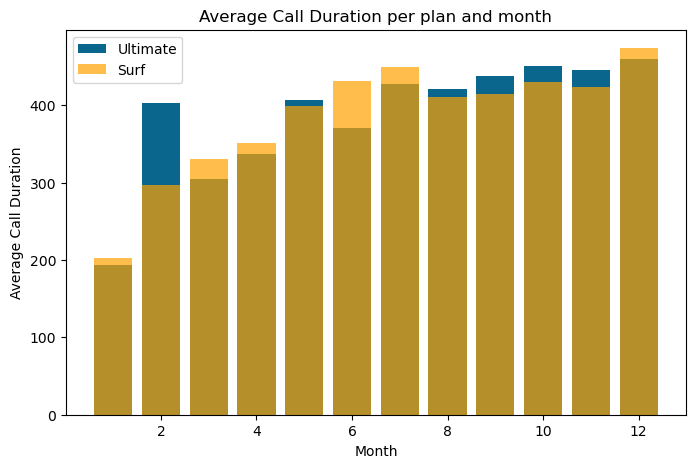

In [29]:
# Comparar la duración promedio de llamadas por cada plan y por cada mes.


# Agrupación de llamadas por plan y por mes. Promedio de la agrupación
df_average_calls = df_merged.groupby(['plan','month'])['call_duration'].mean().reset_index()

# Gráfica
plt.figure(figsize=(8,5))

# Gráfica para el plan ultimate
plan_data = df_average_calls[df_average_calls['plan']=='ultimate']
plt.bar(plan_data['month'], plan_data['call_duration'], label='Ultimate',  color='#0A668C')

# Gráfica para el plan surf
plan_data = df_average_calls[df_average_calls['plan']=='surf']
plt.bar(plan_data['month'], plan_data['call_duration'], label='Surf', color='#ffa100', alpha=0.7)


# Label, title and legend
plt.xlabel('Month')
plt.ylabel('Average Call Duration')
plt.title('Average Call Duration per plan and month')
plt.legend()
plt.show()

La gráfica muestra que el plan "Ultimate" tiene consistentemente una mayor duración promedio de llamadas en comparación con el plan "Surf" a lo largo del año, con una tendencia ascendente en la duración total hacia los últimos meses. Sin embargo, en los primeros meses, especialmente en el mes 2, el plan "Ultimate" contribuye significativamente a la duración total de las llamadas. A partir del mes 4, las duraciones se estabilizan y "Surf" domina casi completamente, alcanzando su punto más alto en el mes 12. inicio del año.

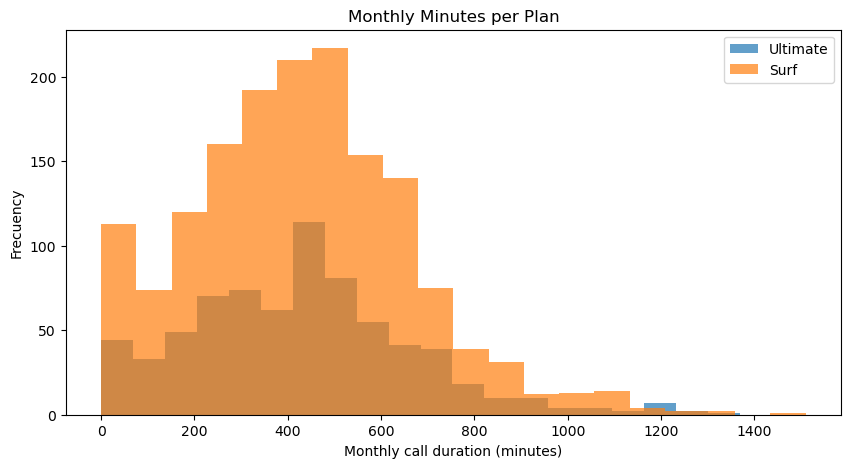

In [30]:
# Comparar el número de minutos mensuales que necesitan los usuarios de cada plan. 

# Gráfica
plt.figure(figsize=(10,5))

# Gráfica para el plan ultimate
plan_minutes = df_merged[df_merged['plan']=='ultimate']
plt.hist(plan_minutes['call_duration'], bins=20, alpha=0.7, label='Ultimate')

# Gráfica para el plan surf
plan_minutes = df_merged[df_merged['plan']=='surf']
plt.hist(plan_minutes['call_duration'], bins=20, alpha=0.7, label='Surf')

# Label, title and legend
plt.xlabel('Monthly call duration (minutes)')
plt.ylabel('Frecuency')
plt.title('Monthly Minutes per Plan')
plt.legend()
plt.show()



La gráfica es un histograma que muestra la distribución de la duración mensual de llamadas por plan ("Ultimate" en azul y "Surf" en naranja). Se observa que la mayoría de los usuarios del plan "Surf" tienen duraciones mensuales de llamadas que se concentran entre 200 y 600 minutos, con un pico alrededor de los 400 minutos. En contraste, el plan "Ultimate" muestra una menor frecuencia en todos los rangos de duración, y su distribución está más dispersa, con algunos usuarios alcanzando hasta 1200 minutos. Esto indica que los usuarios del plan "Surf" tienden a tener un comportamiento más homogéneo en cuanto a la duración de llamadas, mientras que los usuarios del plan "Ultimate" son menos frecuentes pero con algunos casos de uso intensivo.

In [31]:
# Calcular la media y la varianza de la duración mensual de llamadas.

# Media y varianza del plan ultimate
df_plan_ultimate = df_merged[df_merged['plan']=='ultimate'][['month', 'call_duration']]

print('Media del plan Ultimate')
#Media
mean_ultimate = df_plan_ultimate.groupby('month')['call_duration'].mean().reset_index()
display(mean_ultimate)

print('Varianza del plan Ultimate')
#Varianza
var_ultimate = df_plan_ultimate.groupby('month')['call_duration'].var().reset_index()
display(var_ultimate)


# Media y varianza del plan surf
df_plan_surf = df_merged[df_merged['plan']=='surf'][['month', 'call_duration']]

print('Media del plan Surf')
# Media
mean_surf = df_plan_surf.groupby('month')['call_duration'].mean().reset_index()
display(mean_surf)

print('Varianza del plan Surf')
# Varianza
var_surf = df_plan_surf.groupby('month')['call_duration'].var().reset_index()
display(var_surf)


Media del plan Ultimate


,month,call_duration
0,1,193.500000
1,2,403.142857
2,3,304.250000
3,4,336.857143
4,5,406.241379
5,6,370.957447
6,7,427.067797
7,8,421.436620
8,9,437.511628
9,10,450.735849


Varianza del plan Ultimate


,month,call_duration
0,1,16572.333333
1,2,76889.476190
2,3,61984.931818
3,4,34888.928571
4,5,43841.046798
5,6,42503.563367
6,7,72563.374635
7,8,53645.506640
8,9,57070.464569
9,10,54261.910512


Media del plan Surf


,month,call_duration
0,1,203.000000
1,2,297.000000
2,3,330.000000
3,4,351.540000
4,5,399.584416
5,6,431.298969
6,7,449.983471
7,8,410.111111
8,9,414.226804
9,10,429.729958


Varianza del plan Surf


,month,call_duration
0,1,15842.000000
1,2,52226.500000
2,3,35809.363636
3,4,50866.743265
4,5,59754.219754
5,6,45592.628436
6,7,61005.099725
7,8,54344.645963
8,9,46595.958656
9,10,52278.664056


Las tablas muestran la media y la varianza de la duración de llamadas mensuales para los planes "Ultimate" y "Surf". 

Para el **plan Ultimate**, se observa que la media de la duración de llamadas aumenta gradualmente a lo largo del año, comenzando en 193.5 minutos en enero y alcanzando su punto más alto en diciembre con 459.1 minutos. La varianza, que indica la dispersión de los datos, también muestra fluctuaciones, con un pico en febrero ( 6,889.48) y una tendencia general a mantenerse alta a lo largo del año, lo que sugiere una variabilidad considerable en las duraciones de llamadas dentro de este plan.

En el **plan Surf**, la media de la duración de llamadas también muestra un incremento a lo largo del año, iniciando en 203 minutos en enero y alcanzando 473.8 minutos en diciembre. La varianza es alta, pero no tan extrema como en el plan Ultimate, con un valor máximo en diciembre (63,629.52). Esto indica que aunque hay variabilidad, las duraciones de las llamadas en el plan Surf son un poco más consistentes en comparación con el plan Ultimate.

En resumen, ambos planes muestran un aumento en la duración promedio de llamadas a lo largo del año, pero el plan Ultimate presenta una mayor variabilidad, lo que sugiere un comportamiento más diverso entre sus usuarios.

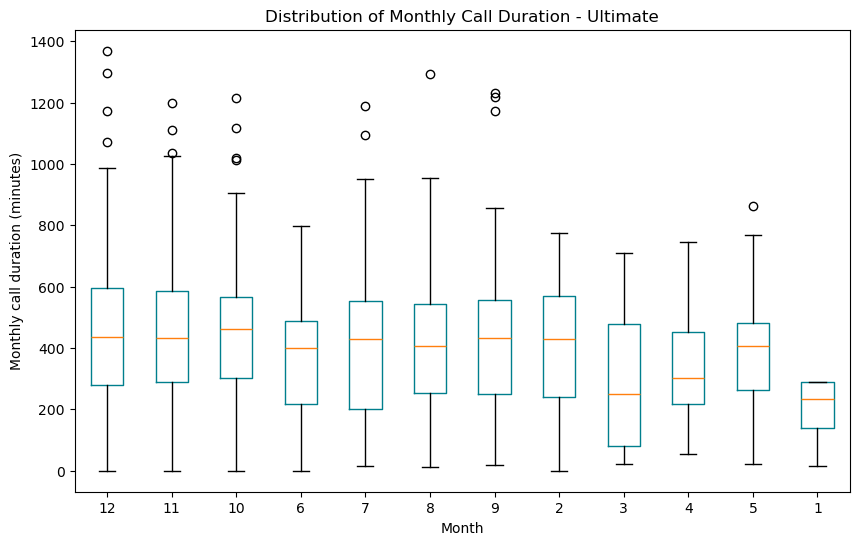

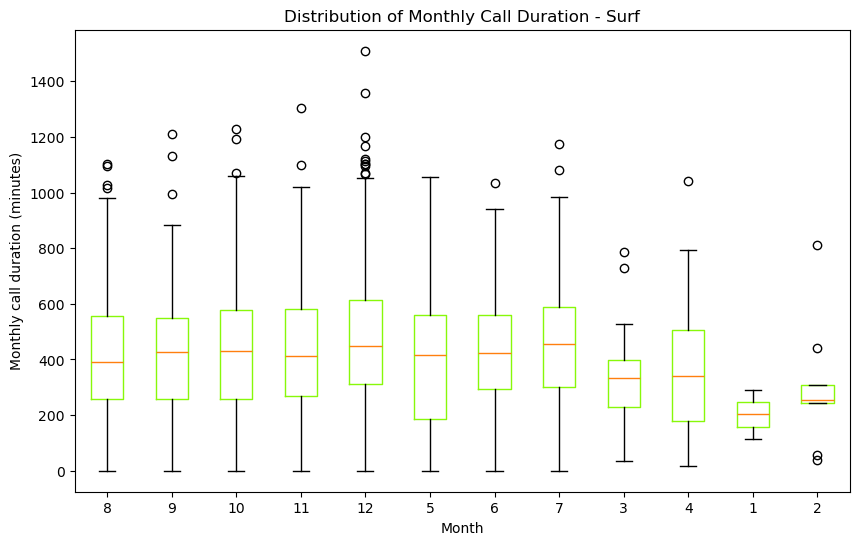

In [32]:
# Trazar un diagrama de caja para visualizar la distribución de la duración mensual de llamadas


# Segementar columnas month y call_duration para los dos planes
df_duration_utlitmate = df_merged[df_merged['plan']=='ultimate'][['month', 'call_duration']]
df_duration_surf = df_merged[df_merged['plan']=='surf'][['month', 'call_duration']]

# Crear un boxplot para ultimate
plt.figure(figsize=(10, 6))
plt.boxplot([df_duration_utlitmate[df_duration_utlitmate['month'] == month]['call_duration'] for month in df_duration_utlitmate['month'].unique()],
            labels=df_duration_utlitmate['month'].unique(), boxprops=dict(color='#007f8d'))
# Label, title and legend
plt.xlabel('Month')
plt.ylabel('Monthly call duration (minutes)')
plt.title('Distribution of Monthly Call Duration - Ultimate')
plt.show()


# Crear un boxplot para surf
plt.figure(figsize=(10, 6))
plt.boxplot([df_duration_surf[df_duration_surf['month'] == month]['call_duration'] for month in df_duration_surf['month'].unique()],
            labels=df_duration_surf['month'].unique(), boxprops=dict(color='#88f80a'))

# Label, title and legend
plt.xlabel('Month')
plt.ylabel('Monthly call duration (minutes)')
plt.title('Distribution of Monthly Call Duration - Surf')
plt.show()


**Conclusiones**

Ambos planes experimentan un aumento en la duración promedio de llamadas hacia fin de año.

El plan "Surf", a diferencia del plan "Ultimate", tiene un mayor número de usuarios que exceden los límites del plan base y, en algunos casos, se encuentran en el rango de valores atípicos. Esta observación podría ser considerada como una indicación para que la empresa ofrezca el plan "Ultimate" a estos usuarios, ya que este plan podría adaptarse mejor a sus necesidades y comportamientos de consumo.

Los usuarios de ambos planes muestran variaciones en su comportamiento a lo largo del año, y la empresa podría beneficiarse al adaptar sus estrategias en función de estos patrones observados.


[Volver a Contenidos](#back)

### Mensajes

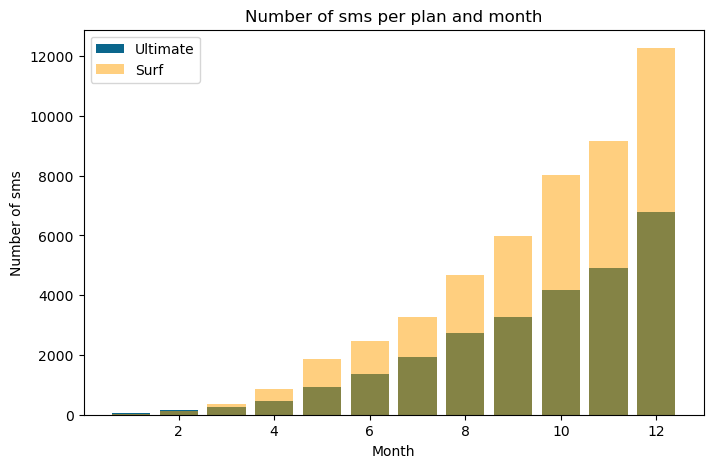

In [33]:
# Comparar el número de mensajes que tienden a enviar cada mes los usuarios de cada plan


# Agrupación de llamadas por plan y por mes. Promedio de la agrupación
df_number_sms =  df_merged.groupby(['plan','month'])['message_number'].sum().reset_index()

# Gráfica
plt.figure(figsize=(8,5))

# Gráfica para el plan ultimate
plan_data = df_number_sms[df_number_sms['plan']=='ultimate']
plt.bar(plan_data['month'], plan_data['message_number'], label='Ultimate',  color='#0A668C')

# Gráfica para el plan surf
plan_data = df_number_sms[df_number_sms['plan']=='surf']
plt.bar(plan_data['month'], plan_data['message_number'], label='Surf', color='#ffa100',alpha=0.5)


# Label, title and legend
plt.xlabel('Month')
plt.ylabel('Number of sms')
plt.title('Number of sms per plan and month')
plt.legend()
plt.show()



A finales de año los usuarios de Megaline en los planes 'surf' y 'ultimate' presentan un mayor incremento de uso de mensajes. Esta tendencia en el aumento del uso de mensajes podría ser un elemento clave para que Megaline ajuste su estrategia comercial y promocional hacia fin de año. 

[Volver a Contenidos](#back)

### Internet

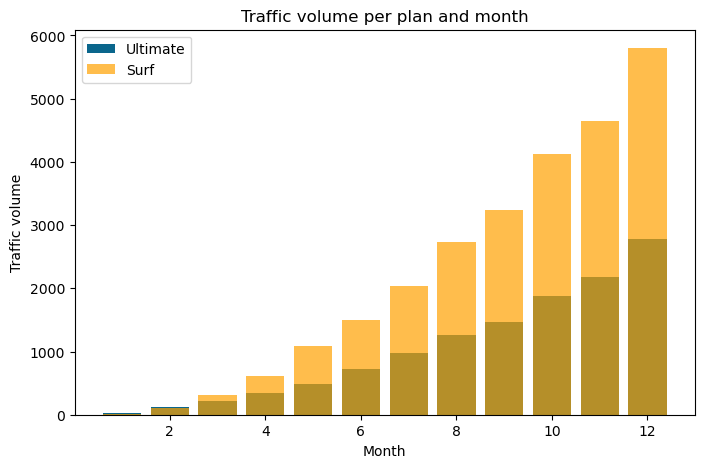

In [34]:
# Comparar la cantidad de tráfico de Internet consumido por usuarios por plan



# Agrupación de llamadas por plan y por mes. Promedio de la agrupación
df_number_gb = df_merged.groupby(['plan','month'])['gb_used'].sum().reset_index()

# Gráfica
plt.figure(figsize=(8,5))

# Gráfica para el plan ultimate
plan_data = df_number_gb[df_number_gb['plan']=='ultimate']
plt.bar(plan_data['month'], plan_data['gb_used'], label='Ultimate',  color='#0A668C')

# Gráfica para el plan surf
plan_data = df_number_gb[df_number_gb['plan']=='surf']
plt.bar(plan_data['month'], plan_data['gb_used'], label='Surf', color='#ffa100', alpha=0.7)


# Label, title and legend
plt.xlabel('Month')
plt.ylabel('Traffic volume')
plt.title('Traffic volume per plan and month')
plt.legend()
plt.show()


A finales de año los usuarios de Megaline en los planes 'surf' y 'ultimate' presentan un mayor incremento de el tráfico de internet. 

[Volver a Contenidos](#back)

## Ingreso

In [35]:
df_merged[df_merged['plan']=='ultimate']['income_per_user'].describe()

count    720.000000
mean      72.313889
std       11.395108
min       70.000000
25%       70.000000
50%       70.000000
75%       70.000000
max      182.000000
Name: income_per_user, dtype: float64

In [36]:
df_merged[df_merged['plan']=='surf']['income_per_user'].describe()

count    1573.000000
mean       60.706408
std        55.388042
min        20.000000
25%        20.000000
50%        40.360000
75%        80.360000
max       590.370000
Name: income_per_user, dtype: float64

In [37]:
ultimate_income = df_merged[df_merged['plan']=='ultimate']['income_per_user'].sum()

surf_income = df_merged[df_merged['plan']=='surf']['income_per_user'].sum()

total_income = df_merged['income_per_user'].sum()

print ("Ultimate income: ", ultimate_income)
print ("Surf income: ", surf_income)
print ("Total income: ", total_income)

Ultimate income:  52066.0
Surf income:  95491.18
Total income:  147557.18


**Estadísticas Descriptivas del Ingreso por Usuario:**
   - **Plan "Ultimate":**
     - **Media:** 72.31 USD
     - **Ingreso Mínimo:** 70.00 USD
     - **Ingreso Máximo:** 182.00 USD

   - **Plan "Surf":**
     - **Media:** 60.70 USD
     - **Ingreso Mínimo:** 20.00 USD
     - **Ingreso Máximo:** 590.00 USD

**Comparación de Ingresos:**
   - El ingreso promedio por usuario en el plan "Ultimate" es superior, con un valor de 72.31 USD en comparación con el plan "Surf" (60.70 USD).

**Ingresos Totales:**
   - El ingreso total generado por el plan "Ultimate" es de 52,066.00 USD.
   - El ingreso total generado por el plan "Surf" es significativamente más alto, alcanzando los 95,491.18 USD.
   - El ingreso total combinado de ambos planes asciende a 147,557.18 USD.

**Conclusiones Generales:**
- Aunque el ingreso promedio por usuario en el plan "Ultimate" es ligeramente más alto, el plan "Surf" genera un ingreso total sustancialmente mayor debido a su mayor base de usuarios.
- La consistencia en los ingresos es mayor en el plan "Ultimate", mientras que el plan "Surf" presenta una mayor variabilidad.
- La estrategia de ingresos y marketing podría beneficiarse al adaptarse a las características distintivas de cada plan para optimizar el rendimiento general.

[Volver a Contenidos](#back)

## Prueba las hipótesis estadísticas <a id='hypothesis'></a>

**Prueba de Hipótesis 1:** El ingreso promedio de los usuarios de las tarifas Ultimate y Surf difiere. 

*Se busca determinar si hay una diferencia significativa en el ingreso promedio entre los usuarios de las dos tarifas, entonces:*

Hipótesis Nula (H0): El ingreso promedio de los usuarios de las tarifas "Ultimate" y "Surf" es igual.

Hipótesis Alternativa (H1): El ingreso promedio de los usuarios de las tarifas "Ultimate" y "Surf" difiere.

**Estadístico de prueba:** Se utilizará una prueba t de dos muestras para comparar los ingresos promedio de los dos grupos.

**Valor Alfa (α):** Valor de 0.05 para la significancia estadística.



In [38]:
# Prueba las hipótesis


df_ultimate = df_merged[df_merged['plan']=='ultimate']['income_per_user']
df_surf = df_merged[df_merged['plan']=='surf']['income_per_user']


alpha = 0.05
result = st.ttest_ind(df_ultimate, df_surf)

print('valor p: ', result.pvalue)

if result.pvalue< alpha:
    print('Rechazamos la Hipótesis nula')
else:
    print("No podemos rechazar la hipótesis nula")


valor p:  2.8626745106986436e-08
Rechazamos la Hipótesis nula


**Prueba de Hipótesis 2:** El ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey difiere al de los usuarios de otras regiones.

*Se busca determinar si hay una diferencia significativa en el ingreso promedio entre los usuarios de Nueva York-Nueva Jersey y los de otras regiones, entonces:*


**Hipótesis Nula (H0):** El ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey es igual al de los usuarios de otras regiones.

**Hipótesis Alternativa (H1):** El ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey difiere al de los usuarios de otras regiones.


**Estadístico de prueba:** Se utilizará una prueba t de dos muestras para comparar los ingresos promedio de los dos grupos.

**Valor Alfa (α):** Valor de 0.05 para la significancia estadística.

In [39]:
# Prueba las hipótesis

df_merged_city = pd.merge(df_merged, df_users[['user_id', 'city']], on='user_id', how='left')

df_selected_city = df_merged_city[df_merged_city['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA']['income_per_user']
df_others_city = df_merged_city[df_merged_city['city']!='New York-Newark-Jersey City, NY-NJ-PA MSA']['income_per_user']

alpha = 0.05
statistic, pvalue = st.ttest_ind(df_selected_city, df_others_city)

print('valor p: ', pvalue)

if pvalue< alpha:
    print('Rechazamos la Hipótesis nula')
else:
    print("No podemos rechazar la hipótesis nula")
    

valor p:  0.043557431621342436
Rechazamos la Hipótesis nula


#### Prueba de Hipótesis 1: Diferencia en el Ingreso Promedio entre Usuarios de los Planes "Ultimate" y "Surf"

En los resultados de la prueba de hipótesis de la diferencia en el Ingreso Promedio entre Usuarios de los Planes "Ultimate" y "Surf", aplicando el estadístico T-student, se obtine un p-value de 2.86e-08, un valor menor al de significancia, por tal motivo se rechaza la hipótesis nula, es decir, existen diferencias significativas en el ingreso promedio entre los usuarios de los planes "Ultimate" y "Surf". 

#### Prueba de Hipótesis 2: Diferencia en el Ingreso Promedio entre Usuarios en el Área de Nueva York-Nueva Jersey y Otras Regiones

En los resultados de la prueba de hipótesis de la diferencia en el Ingreso Promedio entre Usuarios en el Área de Nueva York-Nueva Jersey y Otras Regiones, aplicando el estadístico T-student, se obtine un p-value de 0.04, un valor menor al de significancia, por tal motivo se rechaza la hipótesis nula, es decir, existen diferencias significativas en el ingreso promedio entre los usuarios en el área de Nueva York-Nueva Jersey y los de otras regiones.

[Volver a Contenidos](#back)

## Conclusión <a id='end'></a>

#### Conclusión General del Proyecto:

El análisis integral de los datos de clientes de Megaline revela diferencias sustanciales en el comportamiento y rentabilidad de los planes "Surf" y "Ultimate". A lo largo del año, ambos planes muestran un incremento en el uso de mensajes y tráfico de internet, especialmente hacia finales de año, lo que sugiere que Megaline debería considerar ajustar sus estrategias comerciales y presupuestos publicitarios para capitalizar esta tendencia estacional. Aunque el ingreso promedio por usuario es mayor en el plan "Ultimate" (72.31 USD frente a 60.70 USD en el plan "Surf"), el plan "Surf" genera ingresos totales significativamente más altos debido a su mayor base de usuarios, alcanzando los 95,491.18 USD en comparación con los 52,066.00 USD del plan "Ultimate". Las pruebas de hipótesis realizadas confirman diferencias significativas tanto en los ingresos promedio entre los dos planes como entre las regiones de Nueva York-Nueva Jersey y otras áreas, lo que sugiere la necesidad de enfoques diferenciados según la ubicación geográfica. En conjunto, estos hallazgos proporcionan información valiosa para que Megaline ajuste su estrategia de marketing e ingresos, maximizando la rentabilidad de cada plan mediante la adaptación a las características distintivas de sus usuarios.

[Volver a Contenidos](#back)